In [49]:
import pandas as pd 

In [50]:
import numpy as np

In [51]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [52]:
slatm_out = pd.read_csv("../out/output_SLATM.csv", index_col=0)

In [53]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_1107', 'qm7_5455']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6..."
1,2,"['qm7_5455', 'qm7_1107']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6..."
2,3,"['qm7_5455', 'qm7_1107']","[[6, 6], [6, 6]]",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6..."
3,4,"['qm7_51', 'qm7_1112', 'qm7_111']","[[6], [6, 6], [6, 6, 7]]",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6..."
4,5,"['qm7_51', 'qm7_1112', 'qm7_111']","[[6], [6, 6], [6, 6, 7]]",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6..."
...,...,...,...,...,...,...
995,996,"['qm7_5544', 'qm7_47', 'qm7_111']","[[7, 6, 6], [6], [6, 6, 7]]",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3..."
996,997,"['qm7_6084', 'qm7_6388']","[[8, 6, 6], [6, 6]]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4..."
997,998,"['qm7_6084', 'qm7_6388']","[[8, 6, 6], [6, 6]]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4..."
998,999,"['qm7_1112', 'qm7_5455']","[[6, 6], [6, 6]]",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7..."


In [54]:
from ast import literal_eval 

In [55]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [56]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [57]:
len(np.unique(slatm_out["Sorted Fragments"]))

223

In [58]:
# excess is missing Hs - to fix 

In [59]:
import qml

In [60]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [61]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [62]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [63]:
qm9_counts = count_ncharges(qm9_ncharges)

In [64]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [65]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [66]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [67]:
slatm_out["Excess"] = slatm_out["Fragments"].apply(get_excess_frags)

In [68]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_1107, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6...","[qm7_1107, qm7_5455]"
1,2,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]"
2,3,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]"
3,4,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]"
4,5,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]"
...,...,...,...,...,...,...,...
995,996,"[qm7_5544, qm7_47, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3...","[qm7_111, qm7_47, qm7_5544]"
996,997,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]"
997,998,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]"
998,999,"[qm7_1112, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7...","[qm7_1112, qm7_5455]"


In [69]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
# need ncharges list and list of energies

In [72]:
import qml

In [73]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [74]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [75]:
ncharges = [mol.nuclear_charges for mol in mols]

In [76]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [77]:
energies = qm7["energy / Ha"].to_list()

In [78]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [79]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [80]:
coeff_energies = reg.coef_

In [82]:
coeff_energies = dict(zip(elements, coeff_energies))

In [147]:
coeff_energies

{1: -0.610028423353568,
 6: -38.01906466911171,
 7: -54.647732784759256,
 8: -75.09076868694648,
 16: -397.9423885459585}

In [139]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    energy = float(energy)
    return energy

In [144]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [145]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [146]:
slatm_out["energies / Ha"] = slatm_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_5455 energy -361.092693213899
frag energies -644.715539733947
rxn energy 0.058396610270364135
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_5455 energy -361.092693213899
file qm7_1107 energy -283.622846520048
frag energies -644.715539733947
rxn energy 0.058396610270364135
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_5455 energy -361.092693213899
file qm7_1107 energy -283.622846520048
frag energies -644.715539733947
rxn energy 0.058396610270364135
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7.] excess energy -251.45336878720704
file qm7_51 energy -208.720197958732
file qm7_1112 energy -283.609142403222
file qm7_111 energy -246.83495643340697
frag energies -739.164296795361
rxn energy 0.10652227278805526
excess ncharges [1. 1. 1. 1.

file qm7_111 energy -246.83495643340697
frag energies -778.4180415701029
rxn energy 0.09189901386503152
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_111 energy -246.83495643340697
file qm7_4101 energy -322.86288717796396
file qm7_51 energy -208.720197958732
frag energies -778.4180415701029
rxn energy 0.09189901386503152
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_4944 energy -361.085191192687
frag energies -644.708037712735
rxn energy 0.06589863148244035
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_4944 energy -361.085191192687
file qm7_1107 energy -283.622846520048
frag energies -644.708037712735
rxn energy 0.06589863148244035
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_4139 energy -338.890634235996
file qm7_494

file qm7_5455 energy -361.092693213899
file qm7_1112 energy -283.609142403222
frag energies -644.701835617121
rxn energy 0.07210072709639803
excess ncharges [1. 1. 1. 1. 6. 6. 6. 6.] excess energy -154.5163723698611
file qm7_1107 energy -283.622846520048
file qm7_6388 energy -358.603353532055
frag energies -642.226200052103
rxn energy 0.10762259870014645
excess ncharges [1. 1. 1. 1. 6. 6. 6. 6.] excess energy -154.5163723698611
file qm7_1107 energy -283.622846520048
file qm7_6388 energy -358.603353532055
frag energies -642.226200052103
rxn energy 0.10762259870014645
excess ncharges [1. 1. 1. 1. 6. 6. 6. 6.] excess energy -154.5163723698611
file qm7_1107 energy -283.622846520048
file qm7_6388 energy -358.603353532055
frag energies -642.226200052103
rxn energy 0.10762259870014645
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_4944 energy -361.085191192687
file qm7_4135 energy -322.876099849564
frag energies -683.961291042251
rxn 

file qm7_6084 energy -358.746619990065
frag energies -719.8318111827521
rxn energy 0.03289384841178844
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_5455 energy -361.092693213899
frag energies -644.715539733947
rxn energy 0.058396610270364135
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_5455 energy -361.092693213899
file qm7_1107 energy -283.622846520048
frag energies -644.715539733947
rxn energy 0.058396610270364135
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3957 energy -322.871646197335
frag energies -683.964339411234
rxn energy 0.048718448802191006
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3957 energy -322.871646197335
frag energies -683.9643

file qm7_51 energy -208.720197958732
frag energies -778.407073752958
rxn energy 0.10286683100991922
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_1112 energy -283.609142403222
file qm7_944 energy -286.077733391004
file qm7_51 energy -208.720197958732
frag energies -778.407073752958
rxn energy 0.10286683100991922
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_3917 energy -322.872736448895
file qm7_4944 energy -361.085191192687
frag energies -683.957927641582
rxn energy 0.0551302184541953
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_3917 energy -322.872736448895
file qm7_4944 energy -361.085191192687
frag energies -683.957927641582
rxn energy 0.0551302184541953
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -155.73642921656824
file qm7_1107 energy -283.622846520048
file qm7_6378 ene

file qm7_103 energy -247.967841717436
frag energies -817.6656853288068
rxn energy 0.08337677097995311
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_4101 energy -322.86288717796396
file qm7_111 energy -246.83495643340697
file qm7_103 energy -247.967841717436
frag energies -817.6656853288068
rxn energy 0.08337677097995311
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_4101 energy -322.86288717796396
file qm7_103 energy -247.967841717436
file qm7_111 energy -246.83495643340697
frag energies -817.665685328807
rxn energy 0.08337677097983942
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_111 energy -246.83495643340697
file qm7_4101 energy -322.86288717796396
file qm7_103 energy -247.967841717436
frag energies -817.6656853288068
rxn energy 0.08337677

file qm7_4144 energy -338.89313900209
file qm7_51 energy -208.720197958732
file qm7_6078 energy -358.752909850336
frag energies -906.3662468111579
rxn energy 0.05210997445499288
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_51 energy -208.720197958732
file qm7_3944 energy -322.86166952093
file qm7_111 energy -246.83495643340697
frag energies -778.4168239130689
rxn energy 0.09311667089900766
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_111 energy -246.83495643340697
file qm7_3944 energy -322.86166952093
file qm7_51 energy -208.720197958732
frag energies -778.4168239130689
rxn energy 0.09311667089900766
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_5455 energy -361.092693213899
file qm7_4119 energy -338.889552567006
frag energies -699.982245780905
rxn energy 0.049451771425196966
excess

file qm7_1112 energy -283.609142403222
file qm7_50 energy -208.812352694174
file qm7_51 energy -208.720197958732
frag energies -701.141693056128
rxn energy 0.1100613429093471
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_4542 energy -361.10747234643
file qm7_1112 energy -283.609142403222
frag energies -644.716614749652
rxn energy 0.05732159456542263
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1112 energy -283.609142403222
file qm7_4542 energy -361.10747234643
frag energies -644.716614749652
rxn energy 0.05732159456542263
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_4101 energy -322.86288717796396
file qm7_47 energy -208.741071638824
file qm7_111 energy -246.83495643340697
frag energies -778.438915250195
rxn energy 0.07102533377292275
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.]

file qm7_4139 energy -338.890634235996
file qm7_6388 energy -358.603353532055
frag energies -697.493987768051
rxn energy 0.09759609086489718
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3957 energy -322.871646197335
frag energies -683.964339411234
rxn energy 0.048718448802191006
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3957 energy -322.871646197335
frag energies -683.964339411234
rxn energy 0.048718448802191006
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3957 energy -322.871646197335
frag energies -683.964339411234
rxn energy 0.048718448802191006
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_4944 energy -361.085191192687
file q

file qm7_1112 energy -283.609142403222
file qm7_4538 energy -361.116595044159
frag energies -644.725737447381
rxn energy 0.04819889683639644
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1112 energy -283.609142403222
file qm7_4538 energy -361.116595044159
frag energies -644.725737447381
rxn energy 0.04819889683639644
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -155.73642921656824
file qm7_1107 energy -283.622846520048
file qm7_6378 energy -359.871126246467
frag energies -643.493972766515
rxn energy 0.05990673099529431
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -155.73642921656824
file qm7_1107 energy -283.622846520048
file qm7_6378 energy -359.871126246467
frag energies -643.493972766515
rxn energy 0.05990673099529431
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_4803 energy -361.07862005181505
file qm7_4119 energy -338.889552567006
frag energ

file qm7_111 energy -246.83495643340697
file qm7_103 energy -247.967841717436
frag energies -833.6985158975519
rxn energy 0.06918589452880042
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -345.95025151113873
file qm7_5544 energy -338.895717746709
file qm7_111 energy -246.83495643340697
file qm7_103 energy -247.967841717436
frag energies -833.6985158975519
rxn energy 0.06918589452880042
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_5457 energy -361.09176028326897
frag energies -644.7146068033169
rxn energy 0.05932954090050657
excess ncharges [1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -209.77413357797394
file qm7_4139 energy -338.890634235996
file qm7_6018 energy -358.682621221066
frag energies -697.573255457062
rxn energy 0.01832840185392115
excess ncharges [1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -209.77413357797394
file qm7_4139 energy -

file qm7_944 energy -286.077733391004
file qm7_103 energy -247.967841717436
frag energies -817.654717511662
rxn energy 0.09434458812472712
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_1112 energy -283.609142403222
file qm7_944 energy -286.077733391004
file qm7_103 energy -247.967841717436
frag energies -817.654717511662
rxn energy 0.09434458812472712
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_1112 energy -283.609142403222
file qm7_944 energy -286.077733391004
file qm7_103 energy -247.967841717436
frag energies -817.654717511662
rxn energy 0.09434458812472712
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_5261 energy -361.075510615099
frag energies -644.698357135147
rxn energy 0.07557920907035509
excess ncharges [1. 1. 1. 1. 1. 1. 1

file qm7_1112 energy -283.609142403222
file qm7_47 energy -208.741071638824
file qm7_941 energy -286.079847047313
frag energies -778.430061089359
rxn energy 0.07987949460891741
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_4803 energy -361.07862005181505
frag energies -644.701466571863
rxn energy 0.07246977235442387
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1107 energy -283.622846520048
file qm7_4451 energy -361.096635104735
frag energies -644.7194816247829
rxn energy 0.05445471943446023
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_47 energy -208.741071638824
file qm7_111 energy -246.83495643340697
file qm7_3985 energy -322.856996191556
frag energies -778.433024263787
rxn energy 0.07691632018088512
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6

file qm7_85 energy -246.76945814023603
frag energies -777.213556976865
rxn energy 0.07632676039577291
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -343.5101378177244
file qm7_1112 energy -283.609142403222
file qm7_5518 energy -338.914140601493
file qm7_51 energy -208.720197958732
frag energies -831.243480963447
rxn energy 0.08410713521936941
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -343.5101378177244
file qm7_1112 energy -283.609142403222
file qm7_5518 energy -338.914140601493
file qm7_51 energy -208.720197958732
frag energies -831.243480963447
rxn energy 0.08410713521936941
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -213.43430411809535
file qm7_1112 energy -283.609142403222
file qm7_50 energy -208.812352694174
file qm7_51 energy -208.720197958732
frag energies -701.141693056128
rxn energy 0.1100613429093471
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6

file qm7_5518 energy -338.914140601493
frag energies -700.0068338153919
rxn energy 0.024863736938300462
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_5518 energy -338.914140601493
file qm7_5455 energy -361.092693213899
frag energies -700.0068338153919
rxn energy 0.024863736938300462
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1112 energy -283.609142403222
file qm7_4802 energy -361.119532093658
frag energies -644.72867449688
rxn energy 0.04526184733740024
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_4802 energy -361.119532093658
file qm7_1112 energy -283.609142403222
frag energies -644.72867449688
rxn energy 0.04526184733740024
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1112 energy -283.609142403222
file qm7_4802 energy -361.119532093658
frag energies -644.72867449688
rxn en

file qm7_1112 energy -283.609142403222
file qm7_4944 energy -361.085191192687
frag energies -644.694333595909
rxn energy 0.07960274830836056
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.] excess energy -156.95648606327538
file qm7_1112 energy -283.609142403222
file qm7_4944 energy -361.085191192687
frag energies -644.694333595909
rxn energy 0.07960274830836056
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_4101 energy -322.86288717796396
file qm7_4944 energy -361.085191192687
frag energies -683.9480783706509
rxn energy 0.0649794893853084
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_4944 energy -361.085191192687
file qm7_4101 energy -322.86288717796396
frag energies -683.9480783706509
rxn energy 0.0649794893853084
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_5518 energy -338.914140601493
file qm7_4803 ene

file qm7_5544 energy -338.895717746709
frag energies -699.988410960608
rxn energy 0.0432865917222216
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3985 energy -322.856996191556
frag energies -683.949689405455
rxn energy 0.06336845458119456
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_3985 energy -322.856996191556
frag energies -683.949689405455
rxn energy 0.06336845458119456
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -288.25237660961164
file qm7_119 energy -245.491720084413
file qm7_1112 energy -283.609142403222
file qm7_111 energy -246.83495643340697
frag energies -775.935818921042
rxn energy 0.13400796951162874
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -288.25237660961164
file qm7_1112 energy -283.609142403222
file

file qm7_111 energy -246.83495643340697
frag energies -777.196224271782
rxn energy 0.09365946547882231
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -363.34314529655813
file qm7_51 energy -208.720197958732
file qm7_1112 energy -283.609142403222
file qm7_6078 energy -358.752909850336
frag energies -851.08225021229
rxn energy 0.07834536521016844
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -363.34314529655813
file qm7_1112 energy -283.609142403222
file qm7_51 energy -208.720197958732
file qm7_6078 energy -358.752909850336
frag energies -851.08225021229
rxn energy 0.07834536521016844
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -363.34314529655813
file qm7_1112 energy -283.609142403222
file qm7_51 energy -208.720197958732
file qm7_6078 energy -358.752909850336
frag energies -851.08225021229
rxn energy 0.07834536521016844
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] 

excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -367.95067648795646
file qm7_932 energy -286.00987380198995
file qm7_111 energy -246.83495643340697
file qm7_4101 energy -322.86288717796396
frag energies -855.7077174133608
rxn energy 0.06040935553767213
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_78 energy -230.797450325804
file qm7_51 energy -208.720197958732
file qm7_4119 energy -338.889552567006
frag energies -778.407200851542
rxn energy 0.10273973242590273
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_78 energy -230.797450325804
file qm7_51 energy -208.720197958732
file qm7_4119 energy -338.889552567006
frag energies -778.407200851542
rxn energy 0.10273973242590273
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -343.5101378177244
file qm7_111

file qm7_941 energy -286.079847047313
file qm7_51 energy -208.720197958732
frag energies -833.695762752754
rxn energy 0.07193903932670764
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -345.95025151113873
file qm7_5544 energy -338.895717746709
file qm7_941 energy -286.079847047313
file qm7_51 energy -208.720197958732
frag energies -833.695762752754
rxn energy 0.07193903932670764
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 7.] excess energy -345.95025151113873
file qm7_5544 energy -338.895717746709
file qm7_941 energy -286.079847047313
file qm7_51 energy -208.720197958732
frag energies -833.695762752754
rxn energy 0.07193903932670764
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7.] excess energy -252.6734256339142
file qm7_1112 energy -283.609142403222
file qm7_50 energy -208.812352694174
file qm7_103 energy -247.967841717436
frag energies -740.389336814832
rxn energy 0.10153

file qm7_5518 energy -338.914140601493
frag energies -699.9896512165919
rxn energy 0.04204633573829142
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -329.9316118188448
file qm7_1112 energy -283.609142403222
file qm7_3906 energy -325.323939985799
file qm7_51 energy -208.720197958732
frag energies -817.6532803477529
rxn energy 0.09578175203387218
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -289.47243345631875
file qm7_1112 energy -283.609142403222
file qm7_111 energy -246.83495643340697
file qm7_85 energy -246.76945814023603
frag energies -777.213556976865
rxn energy 0.07632676039577291
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -289.47243345631875
file qm7_1112 energy -283.609142403222
file qm7_111 energy -246.83495643340697
file qm7_85 energy -246.76945814023603
frag energies -777.213556976865
rxn energy 0.07632676039577291
excess ncharges [1. 1. 1

file qm7_4135 energy -322.876099849564
file qm7_6388 energy -358.603353532055
frag energies -681.479453381619
rxn energy 0.09349078500295604
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -194.9755507323871
file qm7_3917 energy -322.872736448895
file qm7_6019 energy -359.89077006036
frag energies -682.763506509255
rxn energy 0.029494504074136785
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7.] excess energy -252.6734256339142
file qm7_1112 energy -283.609142403222
file qm7_94 energy -248.05622680457
file qm7_51 energy -208.720197958732
frag energies -740.385567166524
rxn energy 0.10530874833224857
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5455 energy -361.092693213899
file qm7_4135 energy -322.876099849564
frag energies -683.968793063463
rxn energy 0.04426479657328741
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.] excess energy -196.19560757909423
file qm7_5

file qm7_6018 energy -358.682621221066
file qm7_4119 energy -338.889552567006
frag energies -697.572173788072
rxn energy 0.019410070844003258
excess ncharges [1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -209.77413357797394
file qm7_6018 energy -358.682621221066
file qm7_4119 energy -338.889552567006
frag energies -697.572173788072
rxn energy 0.019410070844003258
excess ncharges [1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -209.77413357797394
file qm7_6388 energy -358.603353532055
file qm7_4119 energy -338.889552567006
frag energies -697.492906099061
rxn energy 0.09867775985497929
excess ncharges [1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -209.77413357797394
file qm7_6388 energy -358.603353532055
file qm7_4119 energy -338.889552567006
frag energies -697.492906099061
rxn energy 0.09867775985497929
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7.] excess energy -252.6734256339142
file qm7_4101 energy -322.86288717796396
file qm7_50 energy -208.812352694174
fi

file qm7_111 energy -246.83495643340697
file qm7_47 energy -208.741071638824
file qm7_5544 energy -338.895717746709
frag energies -794.47174581894
rxn energy 0.05683445732188375
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7. 7.] excess energy -306.7111299953199
file qm7_5544 energy -338.895717746709
file qm7_111 energy -246.83495643340697
file qm7_47 energy -208.741071638824
frag energies -794.47174581894
rxn energy 0.05683445732188375
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_4944 energy -361.085191192687
file qm7_5544 energy -338.895717746709
frag energies -699.9809089393959
rxn energy 0.05078861293429782
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 7.] excess energy -212.21424727138822
file qm7_5544 energy -338.895717746709
file qm7_4944 energy -361.085191192687
frag energies -699.9809089393959
rxn energy 0.05078861293429782
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.

file qm7_1112 energy -283.609142403222
file qm7_51 energy -208.720197958732
frag energies -852.306743328465
rxn energy 0.0739090957422377
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -364.56320214326524
file qm7_1112 energy -283.609142403222
file qm7_5999 energy -359.977402966511
file qm7_51 energy -208.720197958732
frag energies -852.306743328465
rxn energy 0.0739090957422377
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -364.56320214326524
file qm7_1112 energy -283.609142403222
file qm7_5999 energy -359.977402966511
file qm7_51 energy -208.720197958732
frag energies -852.306743328465
rxn energy 0.0739090957422377
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_941 energy -286.079847047313
file qm7_47 energy -208.741071638824
file qm7_1112 energy -283.609142403222
frag energies -778.430061089359
rxn energy 0.07987949460891741
ex

file qm7_4152 energy -338.844917112138
file qm7_51 energy -208.720197958732
frag energies -794.400071504277
rxn energy 0.12850877198491162
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_1112 energy -283.609142403222
file qm7_941 energy -286.079847047313
file qm7_51 energy -208.720197958732
frag energies -778.409187409267
rxn energy 0.1007531747009125
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -290.6924903030259
file qm7_1112 energy -283.609142403222
file qm7_941 energy -286.079847047313
file qm7_51 energy -208.720197958732
frag energies -778.409187409267
rxn energy 0.1007531747009125
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8.] excess energy -364.56320214326524
file qm7_5999 energy -359.977402966511
file qm7_1107 energy -283.622846520048
file qm7_51 energy -208.720197958732
frag energies -852.320447445291
rxn energy 0.0602049789162038
e

file qm7_1112 energy -283.609142403222
file qm7_51 energy -208.720197958732
frag energies -775.9521868820019
rxn energy 0.11764000855174572
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7.] excess energy -288.25237660961164
file qm7_1112 energy -283.609142403222
file qm7_1107 energy -283.622846520048
file qm7_51 energy -208.720197958732
frag energies -775.9521868820019
rxn energy 0.11764000855174572
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7.] excess energy -328.7115549721376
file qm7_1071 energy -285.97906073479
file qm7_1112 energy -283.609142403222
file qm7_111 energy -246.83495643340697
frag energies -816.423159571419
rxn energy 0.10584568166063946
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 7. 7.] excess energy -306.7111299953199
file qm7_47 energy -208.741071638824
file qm7_111 energy -246.83495643340697
file qm7_5544 energy -338.895717746709
frag energies -794.47174581894
rxn energy 0.05683445732188375
e

In [95]:
slatm_out["energies / kcal/mol"] = slatm_out["energies / Ha"] * 627.5

In [96]:
slatm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_1107, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(6, 4), (2, 5), (1, 6), (5, 9)], [(7, 1), (6...","[qm7_1107, qm7_5455]",0.058397,36.643873
1,2,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]",0.058397,36.643873
2,3,"[qm7_5455, qm7_1107]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",114778.0,154778.0,"[[(7, 1), (6, 2), (4, 3), (2, 7), (3, 8)], [(6...","[qm7_1107, qm7_5455]",0.058397,36.643873
3,4,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]",0.106522,66.842726
4,5,"[qm7_51, qm7_1112, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",94791.0,154791.0,"[[(2, 7), (3, 8), (4, 9)], [(1, 1), (2, 2), (6...","[qm7_111, qm7_1112, qm7_51]",0.106522,66.842726
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_5544, qm7_47, qm7_111]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",106335.0,176335.0,"[[(4, 2), (6, 3), (7, 4), (5, 6)], [(4, 7), (3...","[qm7_111, qm7_47, qm7_5544]",0.056834,35.663622
996,997,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]",0.074618,46.822679
997,998,"[qm7_6084, qm7_6388]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",126336.0,176336.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(5, 1), (4...","[qm7_6084, qm7_6388]",0.074618,46.822679
998,999,"[qm7_1112, qm7_5455]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",136353.0,176353.0,"[[(1, 1), (2, 2), (6, 3), (5, 4)], [(6, 5), (7...","[qm7_1112, qm7_5455]",0.072101,45.243206


In [135]:
slatm_out[slatm_out['energies / kcal/mol'] < 1]

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
196,197,"[qm7_6018, qm7_5518]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, ...",116941.0,166941.0,"[[(1, 1), (2, 2), (5, 7), (6, 8), (7, 9)], [(2...","[qm7_5518, qm7_6018]",-0.005178,-3.249172
197,198,"[qm7_6018, qm7_5518]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, ...",116941.0,166941.0,"[[(1, 1), (2, 2), (5, 7), (6, 8), (7, 9)], [(2...","[qm7_5518, qm7_6018]",-0.005178,-3.249172
198,199,"[qm7_5518, qm7_6018]","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, ...",116941.0,166941.0,"[[(2, 3), (1, 4), (6, 5), (7, 6)], [(1, 1), (2...","[qm7_5518, qm7_6018]",-0.005178,-3.249172
429,430,"[qm7_6084, qm7_6018]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",121436.0,171436.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(1, 1), (2...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
430,431,"[qm7_6084, qm7_6018]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",121436.0,171436.0,"[[(6, 3), (7, 4), (2, 5), (1, 6)], [(1, 1), (2...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
431,432,"[qm7_6018, qm7_6084]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",121436.0,171436.0,"[[(1, 1), (2, 2), (5, 7), (6, 8), (7, 9)], [(6...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
547,548,"[qm7_6084, qm7_6018]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",123129.0,173129.0,"[[(1, 1), (6, 3), (7, 4), (2, 5)], [(2, 2), (1...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
548,549,"[qm7_6018, qm7_6084]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",123129.0,173129.0,"[[(2, 2), (1, 6), (5, 7), (6, 8), (7, 9)], [(1...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
623,624,"[qm7_6084, qm7_6018]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",123862.0,173862.0,"[[(7, 4), (2, 5), (1, 6), (6, 9)], [(1, 1), (2...","[qm7_6018, qm7_6084]",-0.004650,-2.917796
625,626,"[qm7_6018, qm7_6084]","[1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, 6.0, 8.0]",123862.0,173862.0,"[[(1, 1), (2, 2), (7, 3), (5, 7), (6, 8)], [(7...","[qm7_6018, qm7_6084]",-0.004650,-2.917796


In [138]:
slatm_out.iloc[196]["Excess"]

array([1., 1., 1., 1., 1., 6., 6., 6., 6., 7.])

In [120]:
import matplotlib.pyplot as plt
import matplotlib

In [129]:
matplotlib.rcParams.update({'font.size': 12})

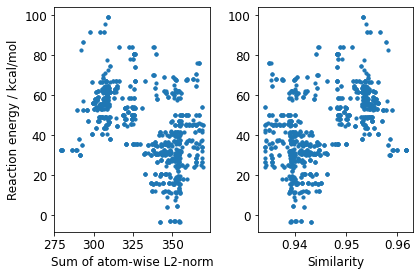

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(slatm_out["ObjValNoPen"]), slatm_out["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-slatm_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, slatm_out["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-slatm.png", dpi=300)
plt.show()